In [13]:
%matplotlib inline
import seaborn
from matplotlib import pylab

In [14]:
import random

import numpy
import Bio
import Bio.Alphabet.IUPAC as IUPAC
import pandas

In [15]:
import sequence_protease_susceptibility
reload(sequence_protease_susceptibility)

<module 'sequence_protease_susceptibility' from 'sequence_protease_susceptibility.py'>

In [16]:
decoys = pandas.DataFrame.from_records(
    [sequence_protease_susceptibility.TestDataGenerator.make_decoy() for _ in range(int(15e3))],
)

decoys["noised_score"] = decoys["score"] + numpy.random.normal(scale=.3, size=len(decoys))

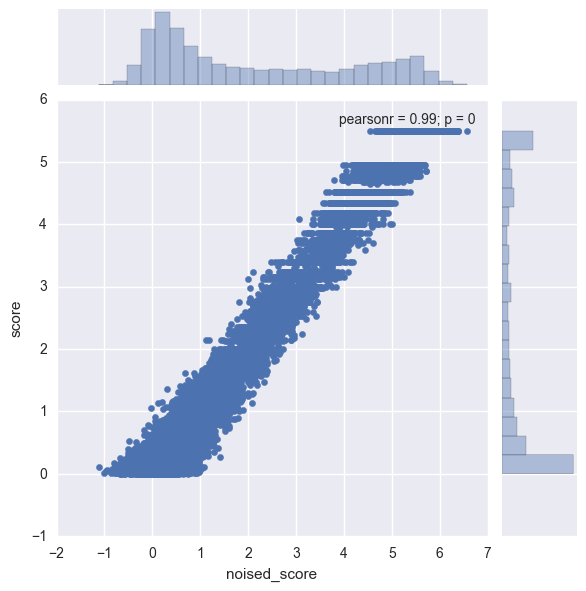

In [17]:
seaborn.jointplot(decoys["noised_score"], decoys["score"])

In [18]:
clm = sequence_protease_susceptibility.CenterLimitedPSSMModel()

In [25]:
clm.from_state(clm.get_state())

CenterLimitedPSSMModel(flanking_window=4, init_aas=None)

In [20]:
clm.fit(decoys["seq"].values, decoys["noised_score"].values)

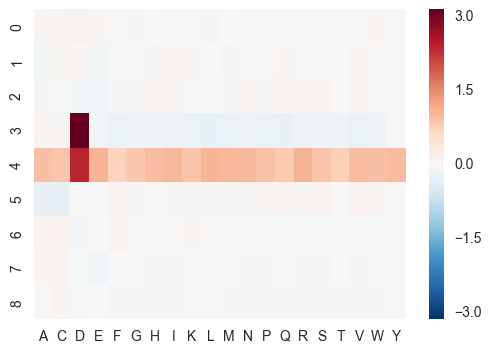

In [21]:
seaborn.heatmap(clm.fit_coeffs_["weights"], xticklabels=IUPAC.IUPACProtein.letters)
pass

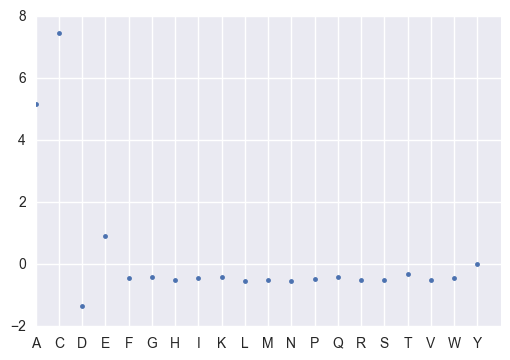

In [26]:
pylab.plot(clm.fit_coeffs_["seq_weights"], ".")
pylab.xticks(range(20), list(IUPAC.IUPACProtein.letters))
pass

In [27]:
pframe = pandas.DataFrame.from_dict({
    "score" : decoys["score"],
    "noised_score" : decoys["noised_score"],
    "pred" : clm.predict(decoys["seq"]),
})

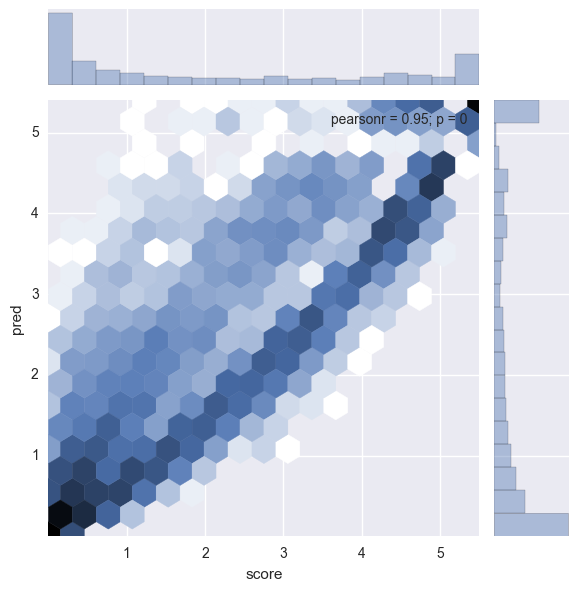

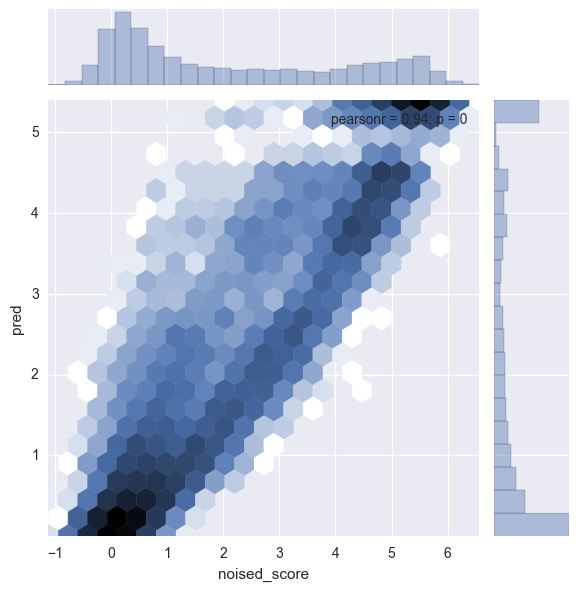

In [31]:
seaborn.jointplot(
    "score", "pred", data=pframe,
    kind="hex", joint_kws=dict(mincnt = 1, bins="log" ))

seaborn.jointplot(
    "noised_score", "pred", data=pframe,
    kind="hex", joint_kws=dict(mincnt = 1, bins="log" ))